In [1]:
import pandas as pd 

import numpy as np

import seaborn as sns
sns.set()         #for plot styling

from copy import deepcopy

import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['figure.figsize'] = (16,9)

plt.style.use('ggplot')

In [2]:
#Importing the Dataset

df = pd.read_csv("C:/Users/user/Desktop/DMX/Datasets/movie_metadata.csv")

df.shape

df.head

<bound method NDFrame.head of       color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
4       NaN        Doug Walker                     NaN       NaN   
...     ...                ...                     ...       ...   
5038  Color        Scott Smith                     1.0      87.0   
5039  Color                NaN                    43.0      43.0   
5040  Color   Benjamin Roberds                    13.0      76.0   
5041  Color        Daniel Hsia                    14.0     100.0   
5042  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David Moore   
1  

In [3]:
df['director_facebook_likes']

0           0.0
1         563.0
2           0.0
3       22000.0
4         131.0
         ...   
5038        2.0
5039        NaN
5040        0.0
5041        0.0
5042       16.0
Name: director_facebook_likes, Length: 5043, dtype: float64

In [4]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [5]:
df = df.iloc[:,4:6]

df

,director_facebook_likes,actor_3_facebook_likes
0,0.0,855.0
1,563.0,1000.0
2,0.0,161.0
3,22000.0,23000.0
4,131.0,NaN
...,...,...
5038,2.0,318.0
5039,NaN,319.0
5040,0.0,0.0
5041,0.0,489.0


In [6]:
df = df.dropna()

In [7]:
#Using the K-means from sklearn

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5)

kmeans.fit(df)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [8]:
kmeans.cluster_centers_

#print(len(kmeans.cluster_centers_))

array([[  153.94452806,   424.19264674],
       [12490.38461538,   605.93269231],
       [  210.77011494, 11126.43678161],
       [17621.21212121,   596.10606061],
       [17545.45454545, 14545.45454545]])

In [9]:
print(kmeans.labels_)

print(len(kmeans.labels_))

[0 0 0 ... 0 0 0]
4919


In [10]:
# kmeans.labels_ indicates the cluster assignments for each data point in the dataset . When you fit a k-means model to your 
# data, it divides the data into clusters, and each data point is assigned to one of these clusters. The label_ attribute  
# stores these assignments, so you can see which cluster each data point belongs to. You can use the cluster assignment  
# for various purposes such as Analyzing the Characteristics of Each Cluster or Making Predictions based on the cluster
# membership of new data points.


print(type(kmeans.labels_))

unique, counts = np.unique(kmeans.labels_, return_counts = True)

print(dict(zip(unique, counts)))

<class 'numpy.ndarray'>
{0: 4651, 1: 104, 2: 87, 3: 66, 4: 11}


C:\Users\user\AppData\Local\Temp\ipykernel_13516\4188932620.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.labels_


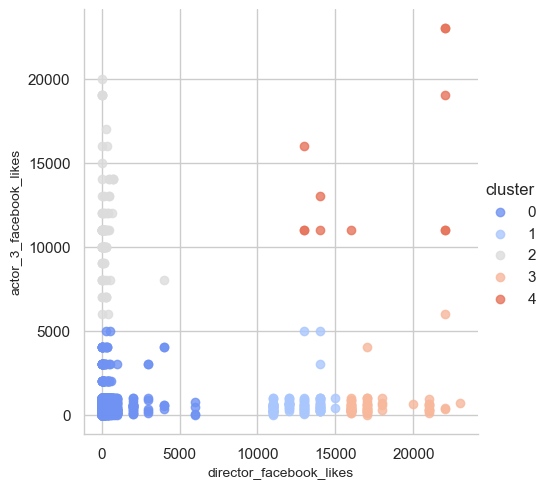

In [11]:
#plot the data

df['cluster'] = kmeans.labels_

sns.set_style('whitegrid')

sns.lmplot(x = 'director_facebook_likes', y ='actor_3_facebook_likes', data = df, hue = 'cluster',
          palette = 'coolwarm',  aspect = 1, fit_reg = False )

In [12]:
#NOTES
# Clustering is a technique in UNSUPERVISED learning where the goal is to group similar data points together based on their 
# features, without the use of labeled data or predefined categories. In contrast, supervised learning algorithms require labeled
# data, where the input data is paired with corresponding target labels, and the algorithm learns to make predictions based on 
# this labeled data. clustering is used for - customer segmentation,anomaly detection and pattern recognition.